In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Summary

`
sns.distplot(np.log(df['price']), bins = 20, hist_kws=dict(edgecolor="k", linewidth=2))  # Histogram
sns.countplot(x='color', data=df) # Barplot, sort order with np.sort(df['color'].unique())
sns.countplot(x='cut', data=df, hue='color') # Barplot with groupby cut, split by color
sns.boxplot(data = df, y = 'carat', x = 'clarity', hue = 'cut') # Boxplot
sns.scatterplot(data = df, x = 'carat', y = 'price', hue = 'cut', alpha = .8, edgecolor = 'None') # Scatterplot
sns.pairplot(data = df[['table', 'price', 'x', 'y', 'color']], hue = 'color') # Pairplot
plt.plot(x,y) # Lineplot
sns.lineplot(data=df, x = 'price', y = 'carat') #Lineplot Seaborn
sns.lmplot(data=df, x = 'price', y = 'carat') # Linear model with conf line
sns.heatmap(data = df.corr(), annot=True) #Heatmap, corr() automatically takes all the numerical variables
sns.heatmap(flights, annot=True, fmt="d") #Heatmap for a entire numerical dataframe
`

You can superimpose graphs on top of each other if they are in the same cell and use the same
x and y variables.  eg you can combine a scatterplot with a line graph.


#### Save the graphic file
`
plt.figure(figsize = (10,6), dpi = 350) # set the size and DPI for saving if needed
plt.savefig('test2.png') # add 'transparent=True' for png
`

In [4]:
# Load dataset
# sns.get_dataset_names()
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Manage axis

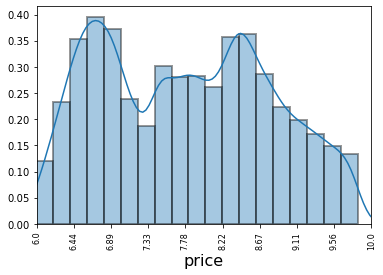

In [5]:
plt.rcParams["axes.labelsize"] = 16 # Set the fontsize of the axis title

# Assigning a plot to a variable 'ax' has no effect, except that varying the parameters
# for the plot becomes easier by referencing the variable.

ax = sns.distplot(np.log(df['price']), bins = 20, hist_kws=dict(edgecolor="k", linewidth=2)) 

# Set axis limits
plt.xlim(6,10) # Hardcode, or set to 'None' for automatic setting
plt.ylim(None,None)

# Controlling ticks
xmin, xmax = ax.get_xlim()  # Can also be ylim
custom_ticks = np.linspace(xmin, xmax, 10) #Pick how many ticks in the linear spacing
# custom_ticks = np.linspace(xmin, xmax, 10, dtype=int) # Use this line for integer ticks
ax.set_xticks(custom_ticks)
ax.set_xticklabels(np.round(custom_ticks,2)) #limit x-axis label to 2 decimal places
for label in ax.get_xticklabels(): #rotate all labels by 90 degrees
        label.set_rotation(90)     # Note it is being done individually for each label by a loop
ax.tick_params(axis="x", labelsize=8) #set fontsize for tick labels


### Detailed examples

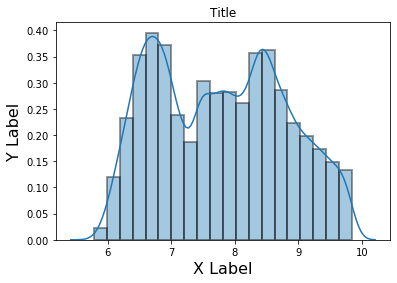

In [6]:
#plt.figure(figsize = (10,6), dpi = 350) # set the size and DPI for saving if needed

# Histogram with edge for the bars, and a density plot (KDE, kernel density estimate)
# You can turn off the kde or the histogram, or add a rug.
# kws means keywords, and kwargs means keyword arguments
# Adding colors based on colormaps using the palette argument:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

sns.distplot(np.log(df['price']), bins = 20, hist_kws=dict(edgecolor="k", linewidth=2)) 

# Labeling
plt.title('Title')
plt.xlabel('X Label')
plt.ylabel('Y Label')

# Axis and ticks
plt.xlim(None,None) # Hardcode, or set to 'None' for automatic setting
plt.ylim(None,None)

# Save the graphic file from this cell. Can also add 'transparent=True' for png
plt.savefig('test2.png') 

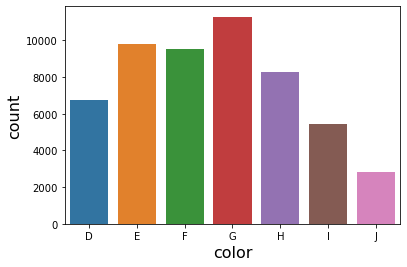

In [7]:
# Barplot for categorical variables
sns.countplot(x='color', data=df, order = np.sort(df['color'].unique()) )
# or sns.countplot(df['sex'])

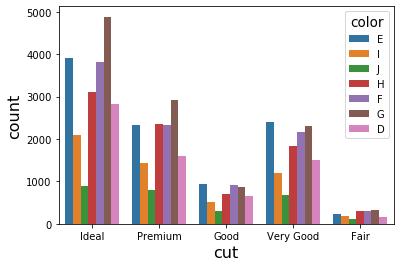

In [8]:
# Barplot with two variables
sns.countplot(x='cut', data=df, hue='color');

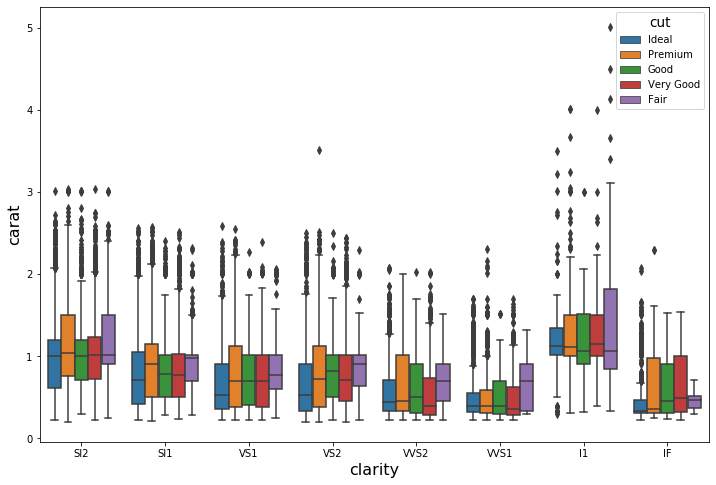

In [9]:
"""
For a basic boxplot, you only need one variable.  You can call it either x or y variable.  
You get one boxplot from this, either along the x-axis or the y-axis. Don't select a 
categorical variable for a boxplot, only a continuous one so there is something to show.

Preferably put the continuous variable along the y-axis.

You can then do a sort of 'group-by' by adding an x-variable which should be categorical,
and the categories will then show on the x-axis.  You can further break down the boxplot
by adding 'hue' as equal to another categorical variable.
"""
plt.figure(figsize = (12,8))
sns.boxplot(data = df, y = 'carat', x = 'clarity', hue = 'cut')

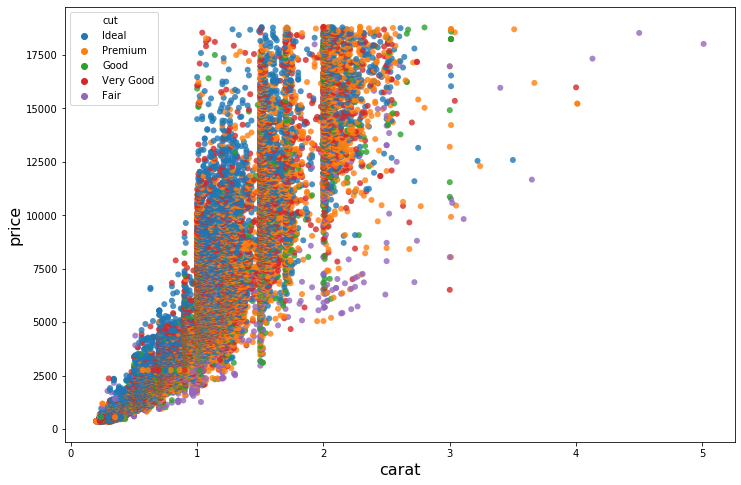

In [10]:
# Scatterplots are pretty self-explanatory.
plt.figure(figsize = (12,8))
sns.scatterplot(data = df, x = 'carat', y = 'price', hue = 'cut', alpha = .8, edgecolor = 'None')
# edgecolor takes out all the whiteness by too many datapoints with a white border on top of each other.
# sns.lineplot(data = df, x = 'price', y = 'table')

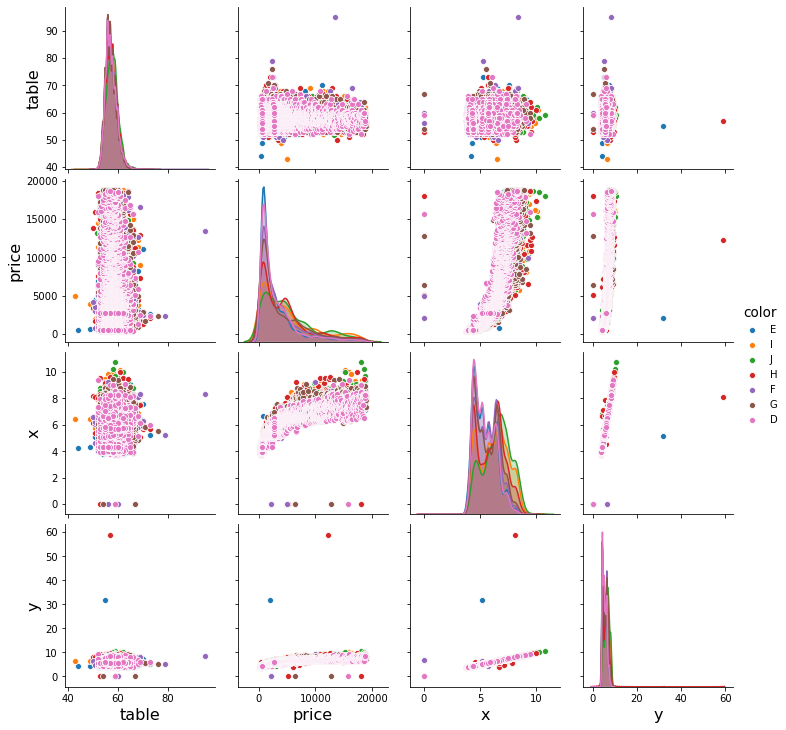

In [11]:
# Pairplots are simple, subset the right columns first.  If using hue, make sure 
# it is there in the data.

sns.pairplot(data = df[['table', 'price', 'x', 'y', 'color']], hue = 'color')

In [12]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


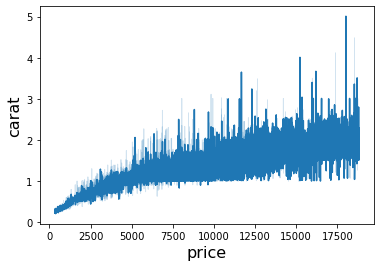

In [13]:
sns.lineplot(data=df, x = 'price', y = 'carat')

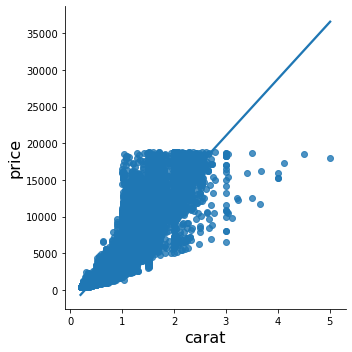

In [14]:
sns.lmplot(x='carat', y='price', data=df) # Linear model with conf line

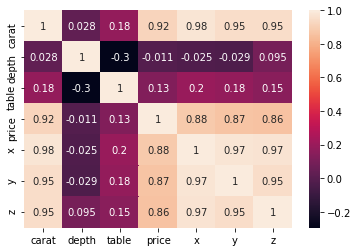

In [15]:
# First get correlation matrix using 'df.corr' then pass that to sns.heatmap
#sns.heatmap(data = df[['table', 'price', 'carat', 'x', 'y', 'z', 'color']].corr(), annot=True)
sns.heatmap(data = df.corr(), annot=True) #corr() automatically takes all the numerical variables

In [16]:
data = df[['table', 'price', 'x', 'y', 'color']]

In [17]:
data.corr()

,table,price,x,y
table,1.000000,0.127134,0.195344,0.183760
price,0.127134,1.000000,0.884435,0.865421
x,0.195344,0.884435,1.000000,0.974701
y,0.183760,0.865421,0.974701,1.000000


In [18]:
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

In [19]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


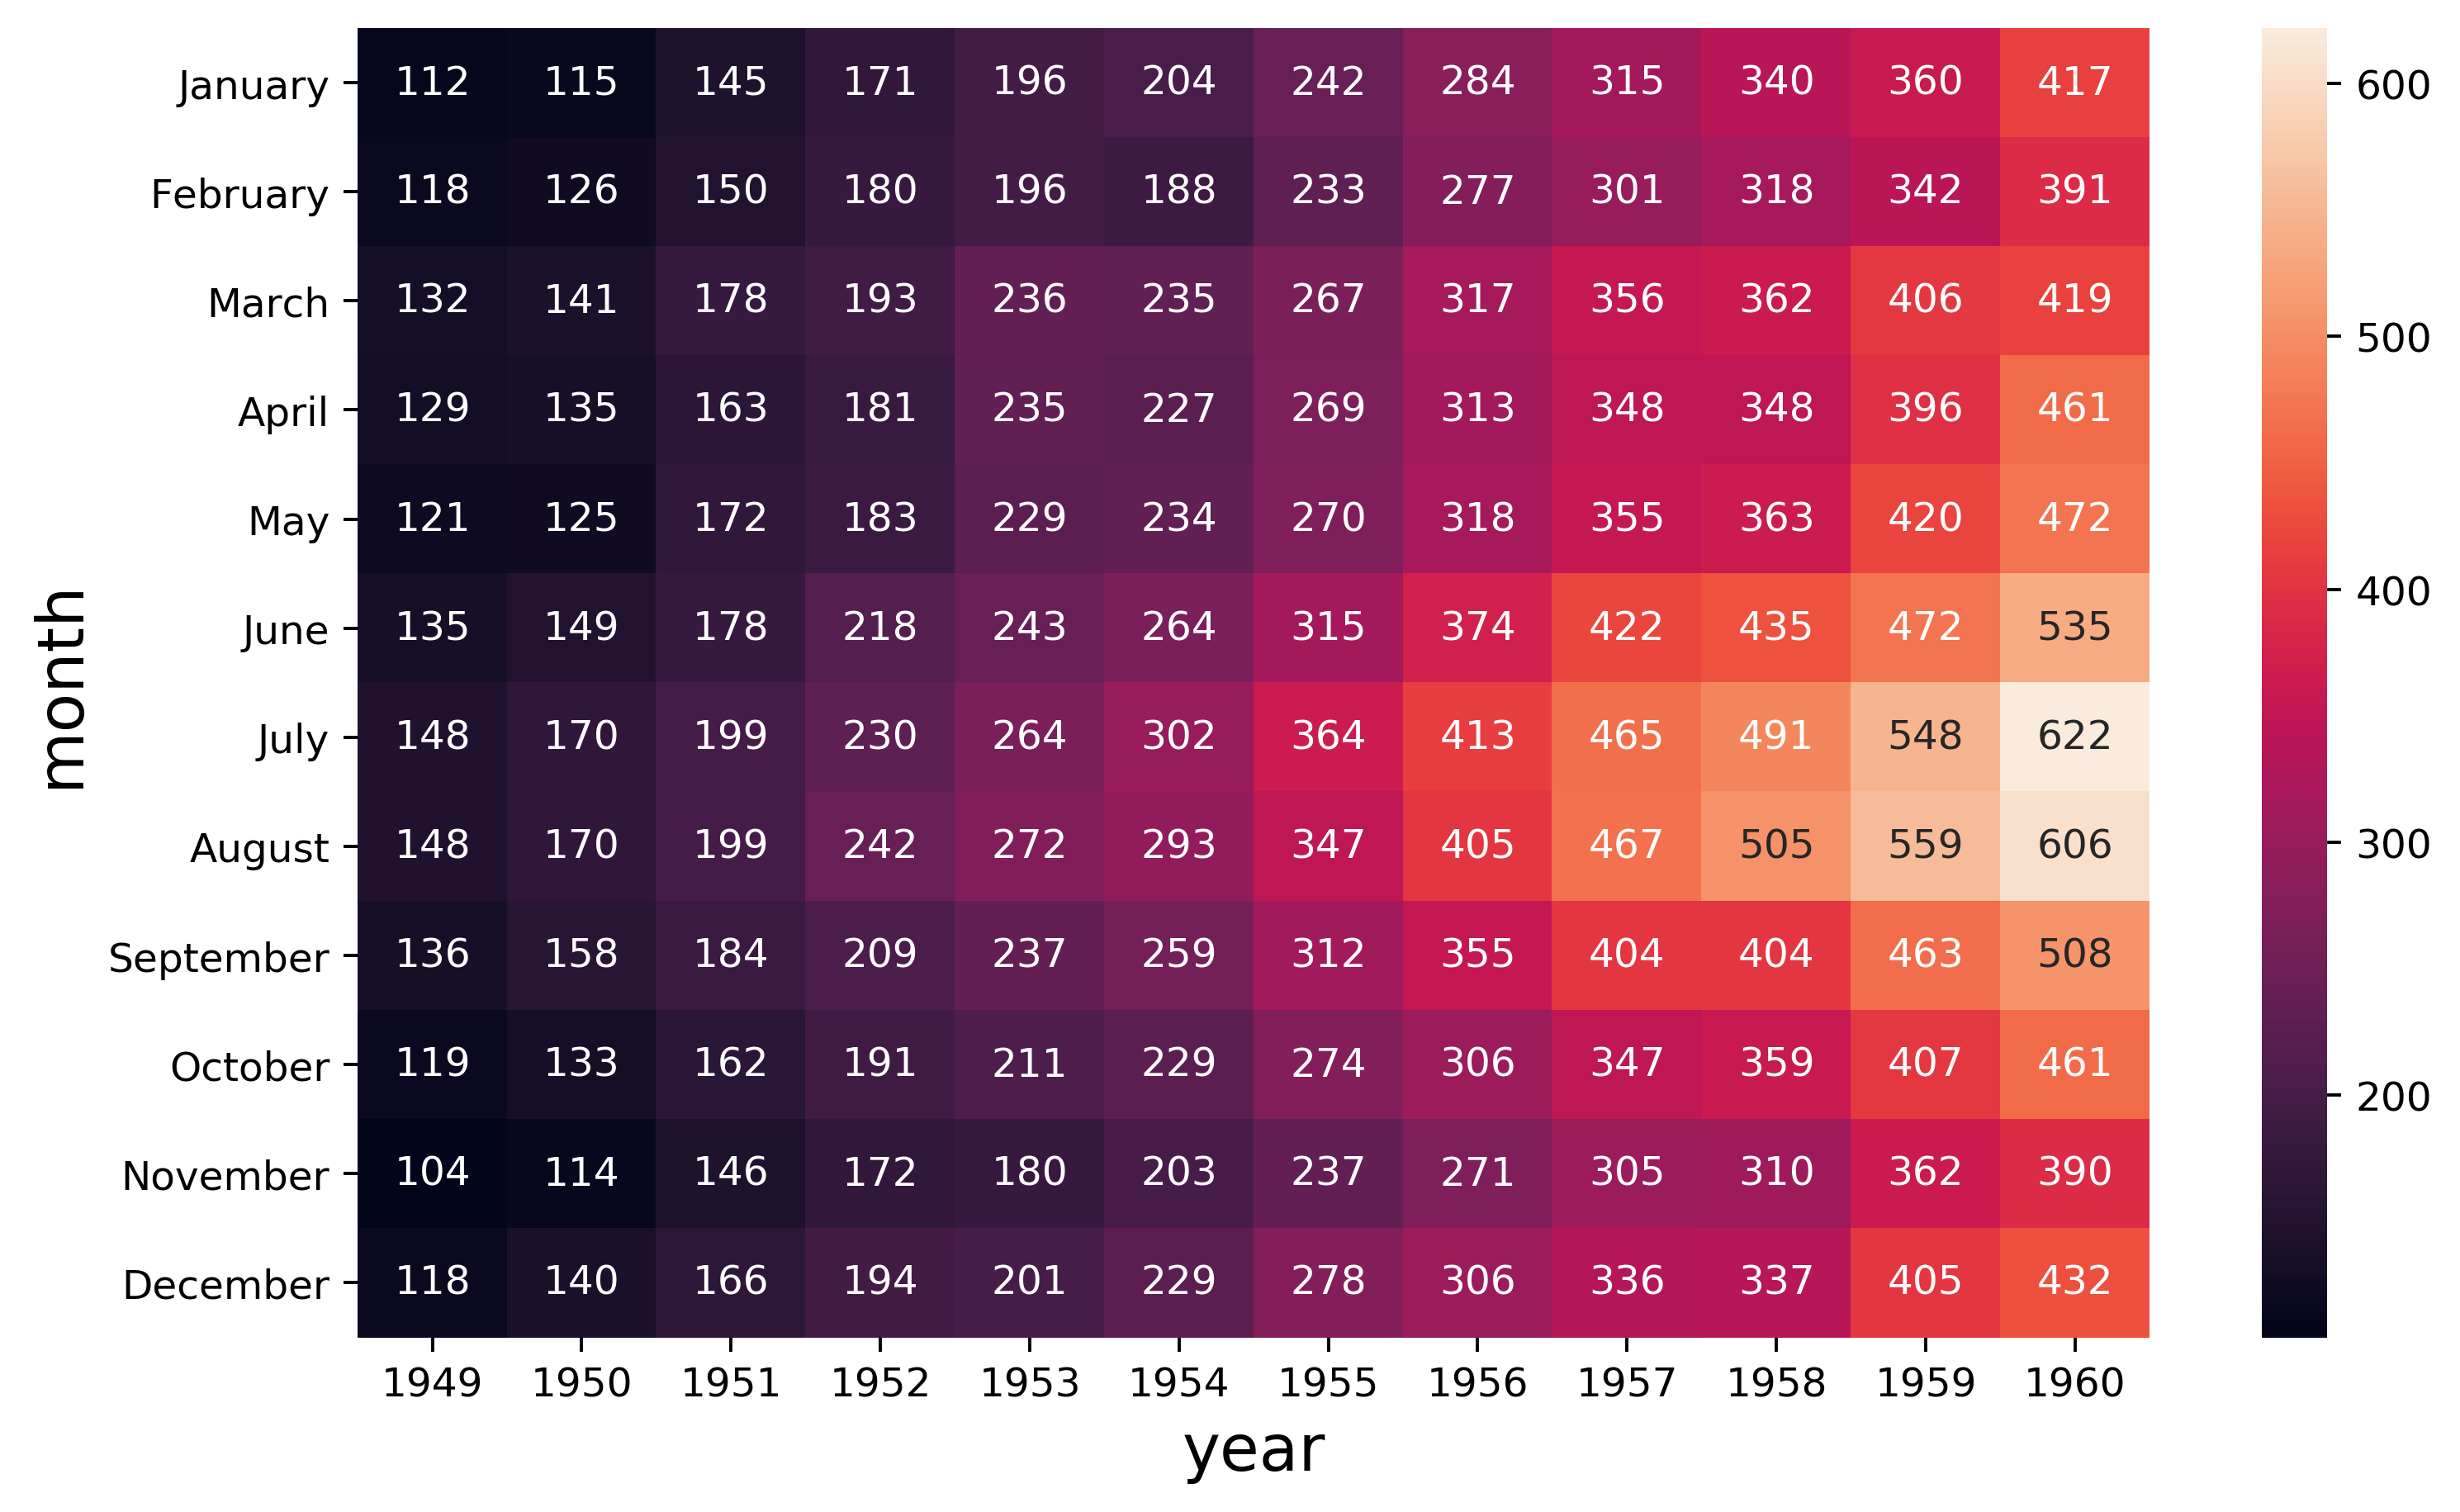

In [20]:
plt.figure(figsize = (10,6), dpi = 350)
sns.heatmap(flights, annot=True, fmt="d")